In [1]:
# PREDICTING WHETHER A PATIENT HAS DIABETES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetespedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Outcome Counts')

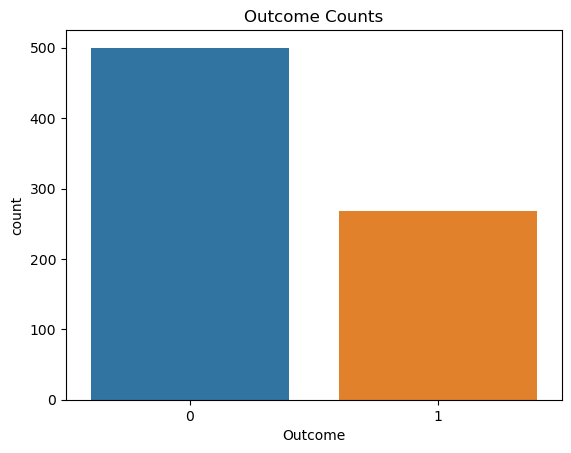

In [5]:
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Counts')

Text(0.5, 1.0, 'Outcome Counts By Pregnancies')

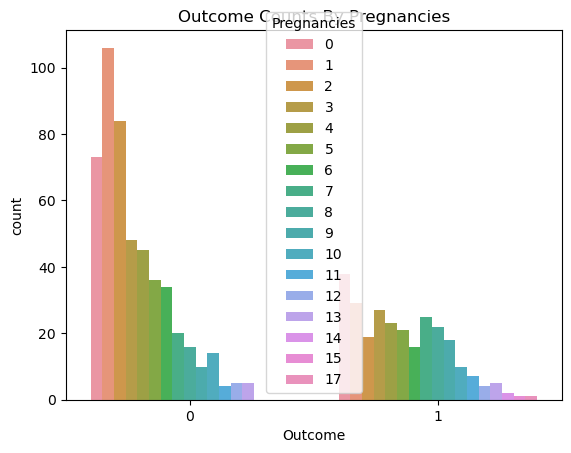

In [6]:
sns.countplot(x='Outcome', hue='Pregnancies', data=df)
plt.title('Outcome Counts By Pregnancies')

Text(0.5, 1.0, 'Age distribution')

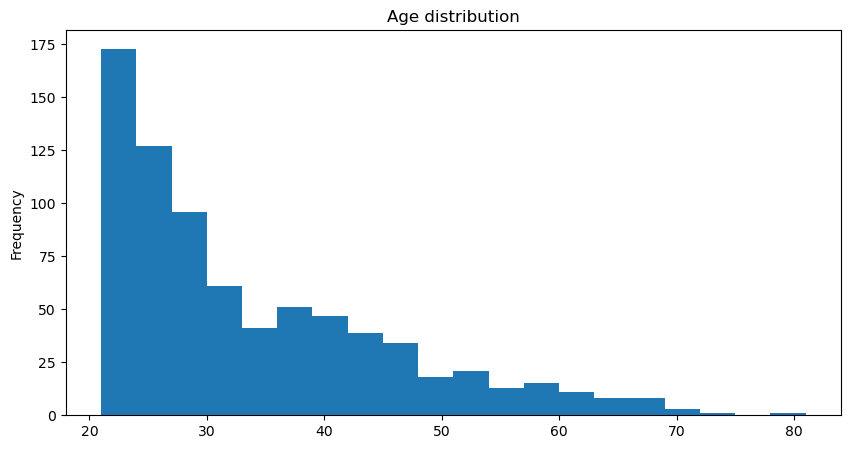

In [7]:
df['Age'].plot.hist(bins=20, figsize=(10,5))
plt.title('Age distribution')

<Axes: ylabel='Frequency'>

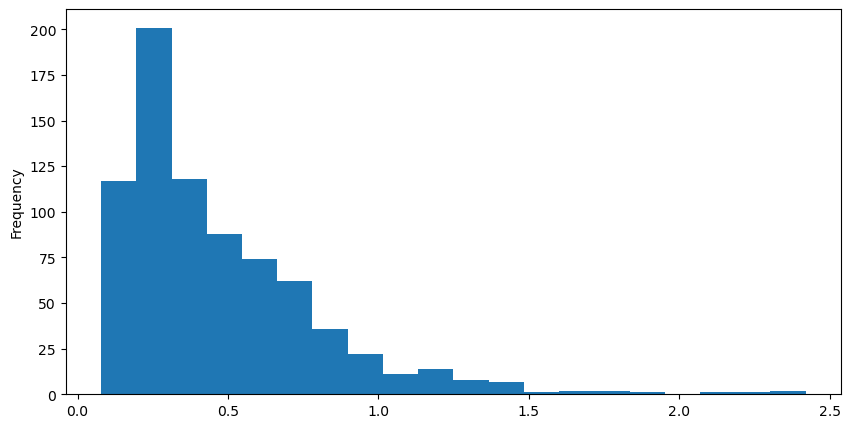

In [8]:
df['DiabetespedigreeFunction'].plot.hist(bins=20, figsize=(10,5))

In [9]:
name = df.groupby(['Age', 'DiabetespedigreeFunction'])['BloodPressure'].mean().reset_index()
name

,Age,DiabetespedigreeFunction,BloodPressure
0,21,0.078,52.0
1,21,0.128,62.0
2,21,0.142,62.0
3,21,0.143,68.0
4,21,0.147,70.0
...,...,...,...
750,69,0.186,80.0
751,69,0.640,82.0
752,70,0.235,82.0
753,72,0.832,0.0


Text(0, 0.5, 'BloodPressure')

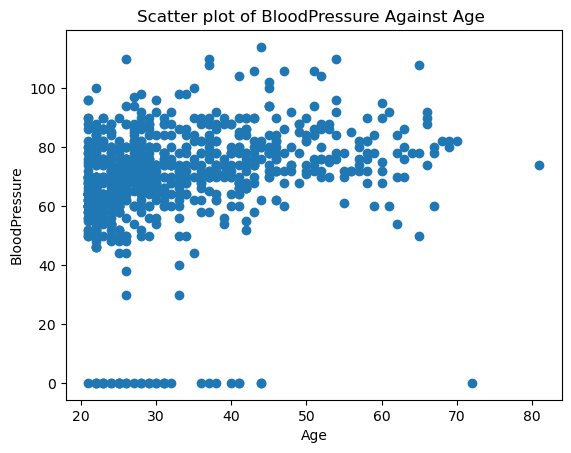

In [10]:
plt.scatter(name['Age'], name['BloodPressure'])
plt.title('Scatter plot of BloodPressure Against Age ')
plt.xlabel('Age')
plt.ylabel('BloodPressure')

In [11]:
name2 = df.groupby(['Glucose', 'Pregnancies'])['Insulin'].mean().reset_index()
name2

,Glucose,Pregnancies,Insulin
0,0,1,7.666667
1,0,5,0.000000
2,0,6,0.000000
3,44,5,0.000000
4,56,2,45.000000
...,...,...,...
531,197,2,271.500000
532,197,4,744.000000
533,197,8,0.000000
534,198,0,274.000000


<Figure size 1000x600 with 0 Axes>

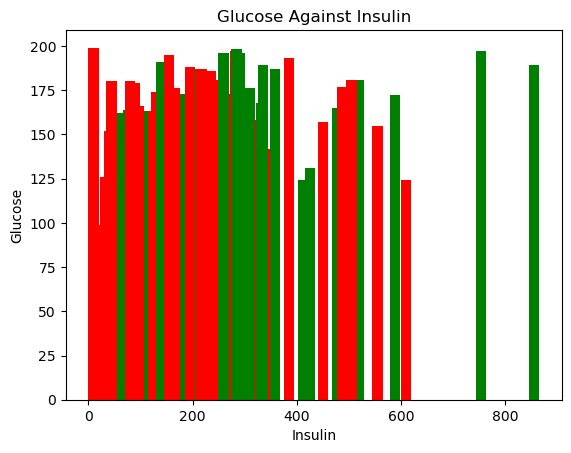

<Figure size 1000x600 with 0 Axes>

In [12]:
plt.bar(name2['Insulin'], name2['Glucose'], color=['green', 'red'], align="edge", width=20)
plt.title('Glucose Against Insulin')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

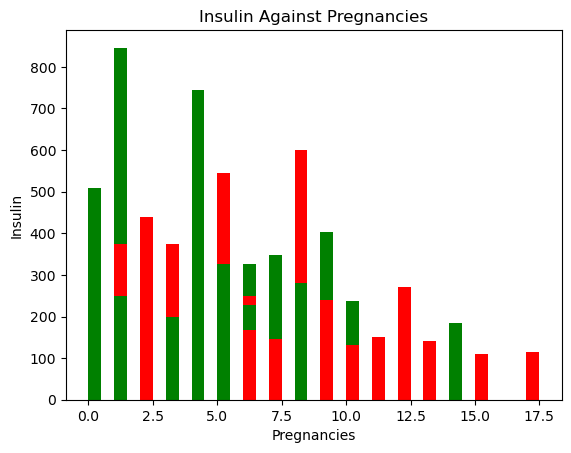

<Figure size 1000x600 with 0 Axes>

In [13]:
plt.bar(name2['Pregnancies'], name2['Insulin'], color=['green', 'red'], align="edge", width=0.5)
plt.title('Insulin Against Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Insulin')
plt.figure(figsize=(10, 6))

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetespedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [16]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
df.DiabetespedigreeFunction.value_counts().reset_index()

,index,DiabetespedigreeFunction
0,0.258,6
1,0.254,6
2,0.268,5
3,0.207,5
4,0.261,5
...,...,...
512,1.353,1
513,0.655,1
514,0.092,1
515,0.926,1


In [18]:
df.duplicated().sum()

0

In [19]:
age2 = df['Age'] <= 50
age2.mean()

0.89453125

In [20]:
age3 = df['Age'] >= 50
age3.mean()

0.11588541666666667

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
X = df.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression(max_iter=1000)

In [32]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.90      0.84        99\n           1       0.76      0.56      0.65        55\n\n    accuracy                           0.78       154\n   macro avg       0.77      0.73      0.74       154\nweighted avg       0.78      0.78      0.77       154\n'

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test, predictions)

array([[89, 10],
       [24, 31]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, predictions)

0.7792207792207793

In [40]:
accuracy_score(y_test, predictions) * 100

77.92207792207793

Text(0.5, 1.0, 'True vs. Predicted Outcome of the diabetes')

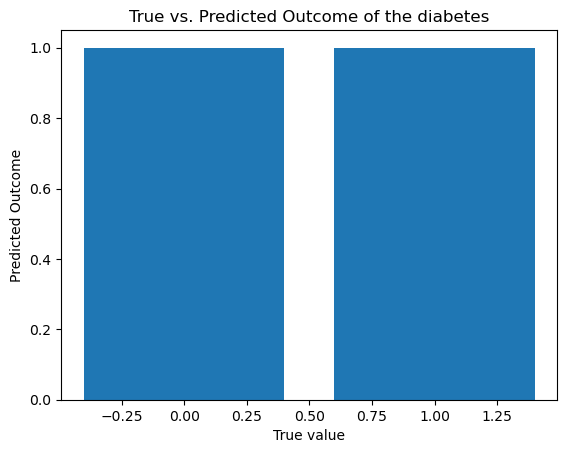

In [41]:
plt.bar(y_test, predictions)
plt.xlabel('True value')
plt.ylabel('Predicted Outcome')
plt.title('True vs. Predicted Outcome of the diabetes')

In [42]:
import pickle

In [43]:
pickle.dump(logmodel, open("logmodel.pkl", "wb"))

In [44]:
pickle.dump(scaler, open("scaler.pkl", "wb"))